In [7]:
!pip install bs4
import requests # library to handle requests
from bs4 import BeautifulSoup

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
print('Libraries imported.')


/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [8]:
#Download list of area code from https://www.downloadexcelfiles.com/us_en/download-list-us-zip-codes-massachusetts-state#.YQLcrY5Kg2w and import into Notebook

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_84a236263e4d4fff9d7ea966df851050 = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_84a236263e4d4fff9d7ea966df851050 = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_84a236263e4d4fff9d7ea966df851050 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='8rAMGZZi0nnYOg5tM5QR5j-e78MKR1Tv6BA2e0i5F5pu',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_84a236263e4d4fff9d7ea966df851050)

body = client_84a236263e4d4fff9d7ea966df851050.get_object(Bucket='courseracapstone-donotdelete-pr-vs1twujrsxlmyw',Key='ma-zip.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

MA_data = pd.read_csv(body)
MA_data.drop(['State', 'Zipcode name'], axis=1, inplace=True)
MA_data.rename(columns={'County Name':'County','City':'Neighborhood'}, inplace=True)
MA_data.head()

,zip,Neighborhood,County
0,2351,ABINGTON,PLYMOUTH
1,2018,ACCORD,PLYMOUTH
2,1720,ACTON,MIDDLESEX
3,2743,ACUSHNET,BRISTOL
4,1220,ADAMS,BERKSHIRE


In [15]:
#Get latitude, Longitude, Estimated Population from https://data.healthcare.gov/resource/52wv-g36k.json
body = client_84a236263e4d4fff9d7ea966df851050.get_object(Bucket='courseracapstone-donotdelete-pr-vs1twujrsxlmyw',Key='Geocodes_USA_with_Counties.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

geo_df= pd.read_csv(body)
geo_df.head()



,zip,primary_city,state,latitude,longitude,county,type,world_region,country,decommissioned,estimated_population,notes
0,501,Holtsville,NY,40.81,-73.04,Suffolk,UNIQUE,NaN,US,0,384,NaN
1,544,Holtsville,NY,40.81,-73.04,Suffolk,UNIQUE,NaN,US,0,0,NaN
2,601,Adjuntas,PR,18.16,-66.72,Adjuntas,STANDARD,NaN,US,0,0,NaN
3,602,Aguada,PR,18.38,-67.18,NaN,STANDARD,NaN,US,0,0,NaN
4,603,Aguadilla,PR,18.43,-67.15,Aguadilla,STANDARD,NaN,US,0,0,NaN


In [14]:
#Create MA dataset
ma_zip=geo_df[geo_df.state == 'MA']
ma_zip=ma_zip[['zip', 'latitude', 'longitude']]
ma_zip.rename(columns={'latitude':'Latitude','longitude':'Longitude'}, inplace=True)
ma_zip["zip"] = ma_zip["zip"].astype(int).astype(str)
ma_zip.head()

,zip,Latitude,Longitude
194,1001,42.06,-72.61
195,1002,42.37,-72.52
196,1003,42.37,-72.52
197,1004,42.37,-72.52
198,1005,42.42,-72.10


In [58]:
MA_df = pd.merge(MA_data, ma_zip, on="zip")
MA_df.drop(['zip'], axis=1, inplace=True)
MA_df = MA_df.drop_duplicates()
MA_df.head(5)




,Neighborhood,County,Latitude,Longitude
0,ABINGTON,PLYMOUTH,42.11,-70.95
1,ACCORD,PLYMOUTH,42.17,-70.88
2,ACTON,MIDDLESEX,42.48,-71.46
3,ACUSHNET,BRISTOL,41.68,-70.90
4,ADAMS,BERKSHIRE,42.62,-73.11


In [59]:
print('The dataframe has {} counties and {} neighborhoods.'.format(
        len(MA_df['County'].unique()),
        MA_df.shape[0]
    )
)

The dataframe has 14 counties and 512 neighborhoods.


In [239]:
map_Massachusetts = folium.Map(location=[latitude, longitude], zoom_start=11)
# add markers to map
# boston_data['Neighborhood']
for row in MA_df.iterrows():
    lat = row[1]['Latitude']
    lng = row[1]['Longitude']
    label = row[1]['Neighborhood']

# for lat, lng, label in zip(boston_data['Latitude'], boston_data['Longitude'], boston_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Massachusetts)  
    
map_Massachusetts

In [60]:
address = 'Boston, MA'
geolocator = Nominatim(user_agent="massachusetts_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Boston are {}, {}.'.format(latitude, longitude))



The geograpical coordinate of Boston are 42.3602534, -71.0582912.


In [61]:
# create map of Boston Area using latitude and longitude values
boston_data = MA_df[MA_df['County'] == 'SUFFOLK'].reset_index(drop=True)
boston_data = boston_data.drop_duplicates()
boston_data.head(18)




,Neighborhood,County,Latitude,Longitude
0,ALLSTON,SUFFOLK,42.35,-71.13
1,BOSTON,SUFFOLK,42.35,-71.06
2,BRIGHTON,SUFFOLK,42.35,-71.15
3,CHARLESTOWN,SUFFOLK,42.38,-71.06
4,CHELSEA,SUFFOLK,42.39,-71.03
5,DORCHESTER,SUFFOLK,42.35,-71.06
6,DORCHESTER CENTER,SUFFOLK,42.35,-71.06
7,EAST BOSTON,SUFFOLK,42.35,-71.06
8,HYDE PARK,SUFFOLK,42.26,-71.11
9,JAMAICA PLAIN,SUFFOLK,42.30,-71.11


In [62]:
map_boston = folium.Map(location=[latitude, longitude], zoom_start=11)
# add markers to map
# boston_data['Neighborhood']
for row in boston_data.iterrows():
    lat = row[1]['Latitude']
    lng = row[1]['Longitude']
    label = row[1]['Neighborhood']

# for lat, lng, label in zip(boston_data['Latitude'], boston_data['Longitude'], boston_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_boston)  
    
map_boston

In [168]:
CLIENT_ID = '44HVGZUCVIWDKLIRDFBK0RD5AE1Y104A2HGKYTI4S4UI0X3C'
CLIENT_SECRET = '1YWAC1PR5DKL4IWEAIS4Y5HTM2XPWV1E1JCVI5Y5DAVDIZSJ'

VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 44HVGZUCVIWDKLIRDFBK0RD5AE1Y104A2HGKYTI4S4UI0X3C
CLIENT_SECRET:1YWAC1PR5DKL4IWEAIS4Y5HTM2XPWV1E1JCVI5Y5DAVDIZSJ


In [81]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
     #set variables
    radius=500
    LIMIT=200
    CLIENT_ID = '44HVGZUCVIWDKLIRDFBK0RD5AE1Y104A2HGKYTI4S4UI0X3C'# Foursquare ID, note there is a daily call quota limit 
    CLIENT_SECRET ='1YWAC1PR5DKL4IWEAIS4Y5HTM2XPWV1E1JCVI5Y5DAVDIZSJ' # Foursquare Secret, note there is a daily call quota it
    venues_list=[]
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            500, 
            100)
            
        # make the GET request
        #print(requests.get(url).json())
        group_data = requests.get(url).json().get("response").get('groups')
        
        if group_data:
            results = group_data[0].get('items')
        else:
            results=''
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v.get("venue").get("id"),
            v.get('venue').get('name'), 
            v.get('venue').get('location').get('lat'), 
            v.get('venue').get('location').get('lng'),  
            v.get('venue').get('categories')[0].get('name')) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue ID',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)
    


In [82]:
boston_venues = getNearbyVenues(names=boston_data['Neighborhood'],
                                   latitudes=boston_data['Latitude'],
                                   longitudes=boston_data['Longitude']
                                  )
boston_venues.head()

(800, 8)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue ID,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ALLSTON,42.35,-71.13,3fd66200f964a520bdeb1ee3,Great Scott,42.350231,-71.130822,Rock Club
1,ALLSTON,42.35,-71.13,5993ab8e356b497a3de157b8,Tous les Jours,42.351753,-71.131665,Bakery
2,ALLSTON,42.35,-71.13,50c24b6019a95fb06d79977b,FroyoWorld - Frozen Yogurt Lounge,42.351608,-71.131662,Frozen Yogurt Shop
3,ALLSTON,42.35,-71.13,4a89e36df964a520430920e3,Shabu Zen,42.352678,-71.129113,Japanese Restaurant
4,ALLSTON,42.35,-71.13,4b6c91a8f964a520c8432ce3,T.J. Maxx,42.348691,-71.129245,Department Store


In [84]:
boston_venues.groupby('Venue Category').count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue ID,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,,
American Restaurant,16,16,16,16,16,16,16
Asian Restaurant,44,44,44,44,44,44,44
Athletics & Sports,3,3,3,3,3,3,3
Automotive Shop,1,1,1,1,1,1,1
Bakery,48,48,48,48,48,48,48
Bank,4,4,4,4,4,4,4
Bar,7,7,7,7,7,7,7
Beach,2,2,2,2,2,2,2
Big Box Store,1,1,1,1,1,1,1


In [116]:
boston_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue ID,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,,
ALLSTON,49,49,49,49,49,49,49
BOSTON,100,100,100,100,100,100,100
BRIGHTON,31,31,31,31,31,31,31
CHARLESTOWN,25,25,25,25,25,25,25
CHELSEA,8,8,8,8,8,8,8
DORCHESTER,100,100,100,100,100,100,100
DORCHESTER CENTER,100,100,100,100,100,100,100
EAST BOSTON,100,100,100,100,100,100,100
HYDE PARK,5,5,5,5,5,5,5


In [105]:
searchfor = ['Restaurant', 'Noodle House','Burrito Place','Breakfast Spot','Burger Joint','Deli / Bodega','Fried Chicken Joint','Pizza Place','Salad Place','Sandwich Place','Taco Place']
boston_restaurants_array=np.unique(boston_venues["Venue Category"].loc[boston_venues["Venue Category"].str.contains('|'.join(searchfor))],return_counts=True)
print(len(boston_restaurants_array[0]))
print(boston_restaurants_array)

35
(array(['American Restaurant', 'Asian Restaurant', 'Breakfast Spot',
       'Burger Joint', 'Cajun / Creole Restaurant', 'Chinese Restaurant',
       'Deli / Bodega', 'Dim Sum Restaurant', 'Dumpling Restaurant',
       'Fast Food Restaurant', 'French Restaurant', 'Fried Chicken Joint',
       'Greek Restaurant', 'Hotpot Restaurant', 'Indian Restaurant',
       'Italian Restaurant', 'Japanese Restaurant', 'Korean Restaurant',
       'Malay Restaurant', 'Mediterranean Restaurant',
       'Mexican Restaurant', 'Middle Eastern Restaurant',
       'New American Restaurant', 'Noodle House', 'Pizza Place',
       'Restaurant', 'Salad Place', 'Sandwich Place',
       'Seafood Restaurant', 'Sushi Restaurant', 'Szechuan Restaurant',
       'Taco Place', 'Thai Restaurant', 'Vegetarian / Vegan Restaurant',
       'Vietnamese Restaurant'], dtype=object), array([16, 44,  1,  7,  1, 55,  2, 12,  1,  3,  6,  2,  1, 12,  2,  9,  7,
        9,  6,  2,  9,  6,  1, 12, 25, 12,  6, 14,  7, 27,  6,  1,  

In [90]:
print(boston_venues.columns)

Index(['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude',
       'Venue ID', 'Venue', 'Venue Latitude', 'Venue Longitude',
       'Venue Category'],
      dtype='object')


In [106]:
searchfor = ['Restaurant', 'Noodle House','Burrito Place','Breakfast Spot','Burger Joint','Deli / Bodega','Fried Chicken Joint','Pizza Place','Salad Place','Sandwich Place','Taco Place']
boston_rest_2=boston_venues.loc[boston_venues["Venue Category"].str.contains('|'.join(searchfor))]
boston_rest_2=boston_rest_2.loc[:,["Venue", "Neighborhood","Venue Latitude","Venue Longitude","Venue Category","Venue ID"]]
boston_rest_2 = boston_rest_2.drop_duplicates()
boston_rest_2.head()


,Venue,Neighborhood,Venue Latitude,Venue Longitude,Venue Category,Venue ID
3,Shabu Zen,ALLSTON,42.352678,-71.129113,Japanese Restaurant,4a89e36df964a520430920e3
9,Oppa Sushi,ALLSTON,42.350910,-71.131357,Sushi Restaurant,534ef45f498e6d754cce70c2
10,Dolphin Bay,ALLSTON,42.352553,-71.128739,Asian Restaurant,554aa34d498e49a9de10481f
12,bb.q chicken,ALLSTON,42.351014,-71.131353,Fried Chicken Joint,58d5a4a713af1c20e21f6b81
13,Mala Restaurant,ALLSTON,42.352960,-71.131033,Chinese Restaurant,5599b403498e4220e1753509


In [107]:
boston_rest_2.shape

(340, 6)

In [108]:
boston_rest_2.groupby(['Neighborhood','Venue Category']).count()

Venue  Venue Latitude  \
Neighborhood      Venue Category                                         
ALLSTON           Asian Restaurant                   1               1   
                  Chinese Restaurant                 3               3   
                  Dumpling Restaurant                1               1   
                  Fried Chicken Joint                2               2   
                  Indian Restaurant                  1               1   
                  Italian Restaurant                 2               2   
                  Japanese Restaurant                1               1   
                  Korean Restaurant                  3               3   
                  Mediterranean Restaurant           1               1   
                  Mexican Restaurant                 3               3   
                  Pizza Place                        2               2   
                  Seafood Restaurant                 1               1   
                  Sushi Restaurant                   2               2   
                  Thai Restaurant                    1               1   
                  Vietnamese Restaurant              2               2   
BOSTON            American Restaurant                2               2   
                  Asian Restaurant                   7               7   
                  Burger Joint                       1               1   
                  Chinese Restaurant                 8               8   
                  Dim Sum Restaurant                 2               2   
                  French Restaurant                  1               1   
                  Hotpot Restaurant                  2               2   
                  Italian Restaurant                 1               1   
                  Japanese Restaurant                1               1   
                  Korean Restaurant                  1               1   
                  Malay Restaurant                   1               1   
                  Mexican Restaurant                 1               1   
                  Middle Eastern Restaurant          1               1   
                  Noodle House                       2               2   
                  Pizza Place                        2               2   
                  Restaurant                         2               2   
                  Salad Place                        1               1   
                  Sandwich Place                     2               2   
                  Seafood Restaurant                 1               1   
                  Sushi Restaurant                   4               4   
                  Szechuan Restaurant                1               1   
                  Vegetarian / Vegan Restaurant      1               1   
                  Vietnamese Restaurant              1               1   
BRIGHTON          American Restaurant                1               1   
                  Burrito Place                      1               1   
                  Chinese Restaurant                 2               2   
                  Deli / Bodega                      1               1   
                  Fast Food Restaurant               1               1   
                  Greek Restaurant                   1               1   
                  Pizza Place                        2               2   
                  Sandwich Place                     1               1   
                  Sushi Restaurant                   1               1   
CHARLESTOWN       Deli / Bodega                      1               1   
                  Italian Restaurant                 1               1   
                  Pizza Place                        2               2   
CHELSEA           Fast Food Restaurant               1               1   
                  Pizza Place                        1               1   
DORCHESTER        American Restaurant                

In [109]:
boston_rest_2.groupby('Venue Category').count()

,Venue,Neighborhood,Venue Latitude,Venue Longitude,Venue ID
Venue Category,,,,,
American Restaurant,16,16,16,16,16
Asian Restaurant,44,44,44,44,44
Breakfast Spot,1,1,1,1,1
Burger Joint,7,7,7,7,7
Burrito Place,1,1,1,1,1
Cajun / Creole Restaurant,1,1,1,1,1
Chinese Restaurant,55,55,55,55,55
Deli / Bodega,2,2,2,2,2
Dim Sum Restaurant,12,12,12,12,12


In [121]:
searchfor = ['Japanese', 'Sushi', 'Korean', 'Vietnamese','Szechuan','Thai','Malay','Dim Sum','Noodle House', 'Indian','Vegetarian / Vegan', 'Dumpling','Asian','Hotpot','Indian']
boston_asian_rest=boston_rest_2.loc[boston_rest_2["Venue Category"].str.contains('|'.join(searchfor))]
boston_asian_rest.head()

,Venue,Neighborhood,Venue Latitude,Venue Longitude,Venue Category,Venue ID
3,Shabu Zen,ALLSTON,42.352678,-71.129113,Japanese Restaurant,4a89e36df964a520430920e3
9,Oppa Sushi,ALLSTON,42.350910,-71.131357,Sushi Restaurant,534ef45f498e6d754cce70c2
10,Dolphin Bay,ALLSTON,42.352553,-71.128739,Asian Restaurant,554aa34d498e49a9de10481f
19,Seoul Soulongtang,ALLSTON,42.350246,-71.131866,Korean Restaurant,528ed6f311d2782026f3db76
22,Dumpling Kingdom,ALLSTON,42.352077,-71.131895,Dumpling Restaurant,57845b4e498e0942ee8b3ce6


In [122]:
boston_asian_rest.shape

(153, 6)

In [123]:
boston_asian_rest.groupby(['Neighborhood','Venue Category']).count()

Venue  Venue Latitude  \
Neighborhood      Venue Category                                         
ALLSTON           Asian Restaurant                   1               1   
                  Dumpling Restaurant                1               1   
                  Indian Restaurant                  1               1   
                  Japanese Restaurant                1               1   
                  Korean Restaurant                  3               3   
                  Sushi Restaurant                   2               2   
                  Thai Restaurant                    1               1   
                  Vietnamese Restaurant              2               2   
BOSTON            Asian Restaurant                   7               7   
                  Dim Sum Restaurant                 2               2   
                  Hotpot Restaurant                  2               2   
                  Japanese Restaurant                1               1   
                  Korean Restaurant                  1               1   
                  Malay Restaurant                   1               1   
                  Noodle House                       2               2   
                  Sushi Restaurant                   4               4   
                  Szechuan Restaurant                1               1   
                  Vegetarian / Vegan Restaurant      1               1   
                  Vietnamese Restaurant              1               1   
BRIGHTON          Sushi Restaurant                   1               1   
DORCHESTER        Asian Restaurant                   7               7   
                  Dim Sum Restaurant                 2               2   
                  Hotpot Restaurant                  2               2   
                  Japanese Restaurant                1               1   
                  Korean Restaurant                  1               1   
                  Malay Restaurant                   1               1   
                  Noodle House                       2               2   
                  Sushi Restaurant                   4               4   
                  Szechuan Restaurant                1               1   
                  Vegetarian / Vegan Restaurant      1               1   
                  Vietnamese Restaurant              1               1   
DORCHESTER CENTER Asian Restaurant                   7               7   
                  Dim Sum Restaurant                 2               2   
                  Hotpot Restaurant                  2               2   
                  Japanese Restaurant                1               1   
                  Korean Restaurant                  1               1   
                  Malay Restaurant                   1               1   
                  Noodle House                       2               2   
                  Sushi Restaurant                   4               4   
                  Szechuan Restaurant                1               1   
                  Vegetarian / Vegan Restaurant      1               1   
                  Vietnamese Restaurant              1               1   
EAST BOSTON       Asian Restaurant                   7               7   
                  Dim Sum Restaurant                 2               2   
                  Hotpot Restaurant                  2               2   
                  Japanese Restaurant                1               1   
                  Korean Restaurant                  1               1   
                  Malay Restaurant                   1               1   
                  Noodle House                       2               2   
                  Sushi Restaurant                   4               4   
                  Szechuan Restaurant                1               1   
                  Vegetarian / Vegan Restaurant      1               1   
                  Vietnamese Restaurant              

In [115]:
boston_rest_3.groupby(['Venue Category','Neighborhood']).count()

Venue  Venue Latitude  \
Venue Category                Neighborhood                               
Asian Restaurant              ALLSTON                1               1   
                              BOSTON                 7               7   
                              DORCHESTER             7               7   
                              DORCHESTER CENTER      7               7   
                              EAST BOSTON            7               7   
                              REVERE                 1               1   
                              ROXBURY                7               7   
                              ROXBURY CROSSING       7               7   
Dim Sum Restaurant            BOSTON                 2               2   
                              DORCHESTER             2               2   
                              DORCHESTER CENTER      2               2   
                              EAST BOSTON            2               2   
                              ROXBURY                2               2   
                              ROXBURY CROSSING       2               2   
Dumpling Restaurant           ALLSTON                1               1   
Hotpot Restaurant             BOSTON                 2               2   
                              DORCHESTER             2               2   
                              DORCHESTER CENTER      2               2   
                              EAST BOSTON            2               2   
                              ROXBURY                2               2   
                              ROXBURY CROSSING       2               2   
Indian Restaurant             ALLSTON                1               1   
                              JAMAICA PLAIN          1               1   
Japanese Restaurant           ALLSTON                1               1   
                              BOSTON                 1               1   
                              DORCHESTER             1               1   
                              DORCHESTER CENTER      1               1   
                              EAST BOSTON            1               1   
                              ROXBURY                1               1   
                              ROXBURY CROSSING       1               1   
Korean Restaurant             ALLSTON                3               3   
                              BOSTON                 1               1   
                              DORCHESTER             1               1   
                              DORCHESTER CENTER      1               1   
                              EAST BOSTON            1               1   
                              ROXBURY                1               1   
                              ROXBURY CROSSING       1               1   
Malay Restaurant              BOSTON                 1               1   
                              DORCHESTER             1               1   
                              DORCHESTER CENTER      1               1   
                              EAST BOSTON            1               1   
                              ROXBURY                1               1   
                              ROXBURY CROSSING       1               1   
Noodle House                  BOSTON                 2               2   
                              DORCHESTER             2               2   
                              DORCHESTER CENTER      2               2   
                              EAST BOSTON            2               2   
                              ROXBURY                2               2   
                              ROXBURY CROSSING       2               2   
Sushi Restaurant              ALLSTON                2               2   
                              BOSTON                 4               4   
                              BRIGHTON               1               1   
                              DORCHESTER             

In [124]:
boston_asian_rest.groupby('Neighborhood').count()

,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue ID
Neighborhood,,,,,
ALLSTON,12,12,12,12,12
BOSTON,23,23,23,23,23
BRIGHTON,1,1,1,1,1
DORCHESTER,23,23,23,23,23
DORCHESTER CENTER,23,23,23,23,23
EAST BOSTON,23,23,23,23,23
JAMAICA PLAIN,1,1,1,1,1
REVERE,1,1,1,1,1
ROXBURY,23,23,23,23,23


In [125]:
boston_asian_rest.groupby('Venue Category').count()

,Venue,Neighborhood,Venue Latitude,Venue Longitude,Venue ID
Venue Category,,,,,
Asian Restaurant,44,44,44,44,44
Dim Sum Restaurant,12,12,12,12,12
Dumpling Restaurant,1,1,1,1,1
Hotpot Restaurant,12,12,12,12,12
Indian Restaurant,2,2,2,2,2
Japanese Restaurant,7,7,7,7,7
Korean Restaurant,9,9,9,9,9
Malay Restaurant,6,6,6,6,6
Noodle House,12,12,12,12,12


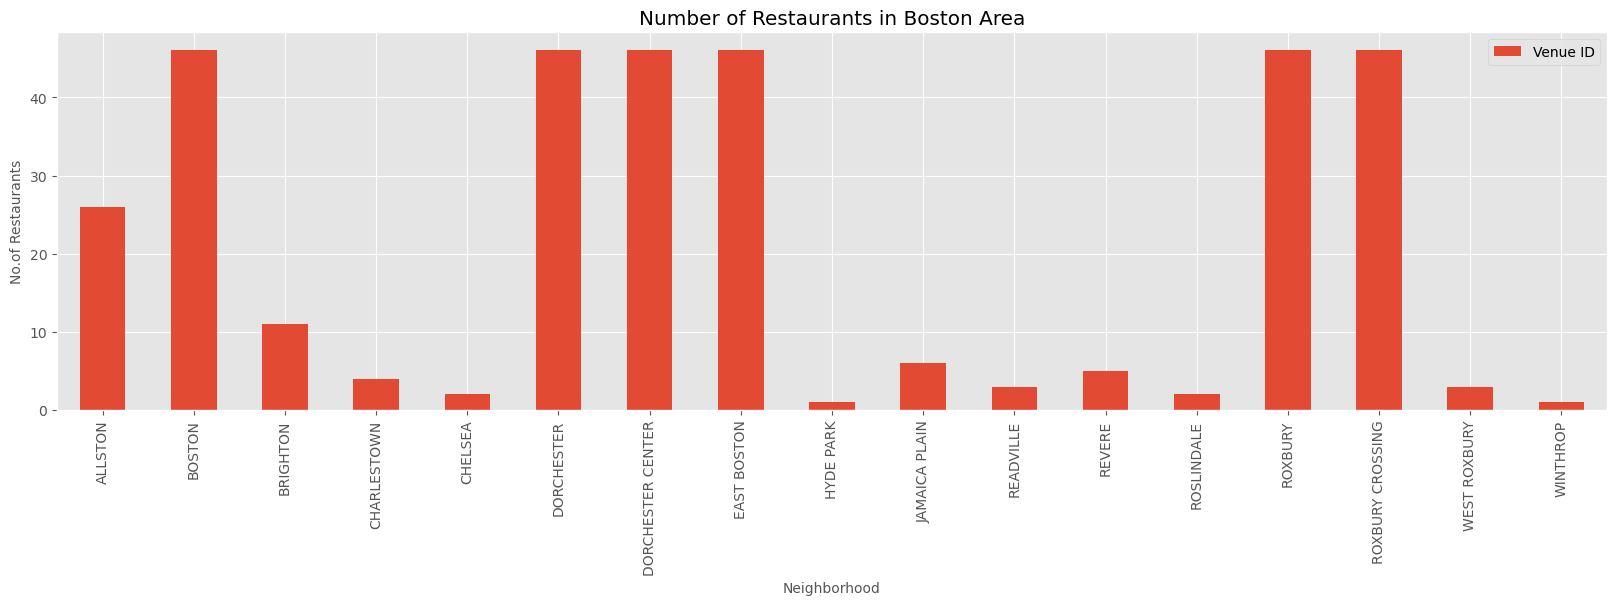

In [128]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(20,5), dpi = 100)
# title
plt.title('Number of Restaurants in Boston Area')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 10)
#On y-axis
plt.ylabel('No.of Restaurants', fontsize=10)
#giving a bar plot
boston_rest_2.groupby('Neighborhood')['Venue ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

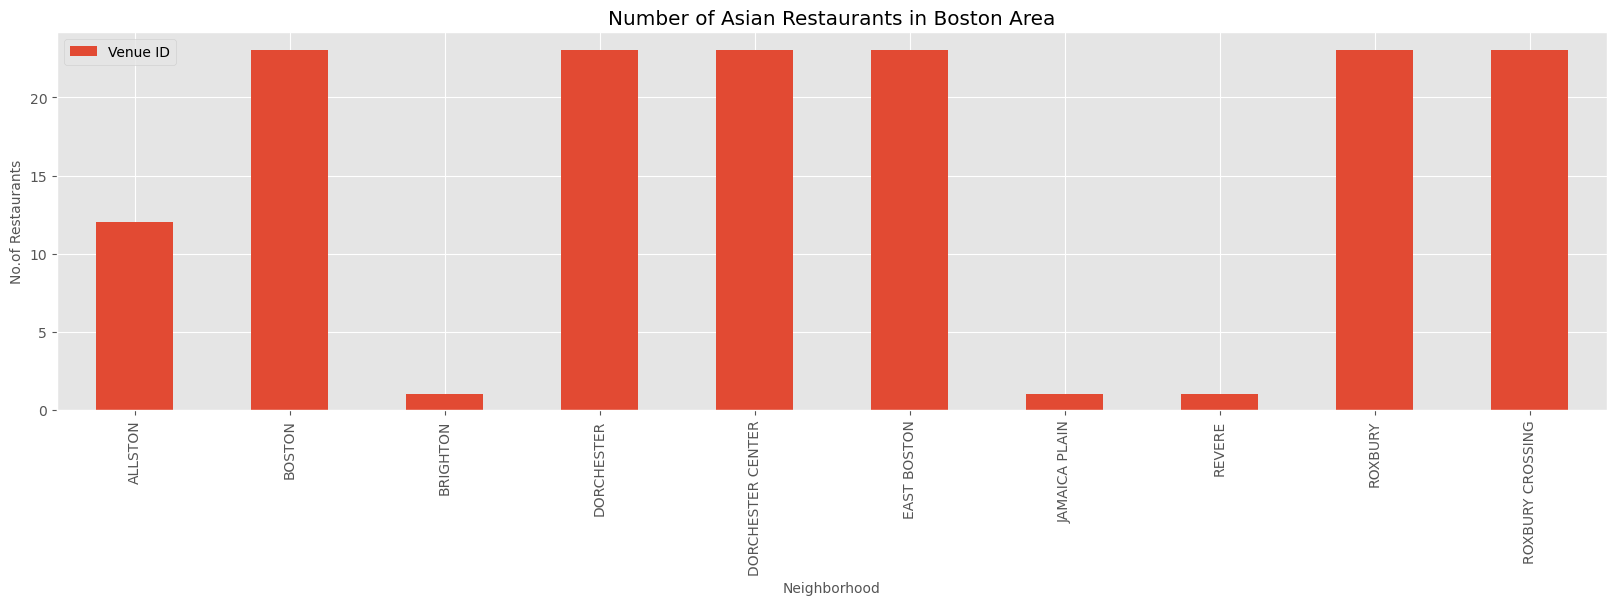

In [129]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(20,5), dpi = 100)
# title
plt.title('Number of Asian Restaurants in Boston Area')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 10)
#On y-axis
plt.ylabel('No.of Restaurants', fontsize=10)
#giving a bar plot
boston_asian_rest.groupby('Neighborhood')['Venue ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [51]:
ma_population=geo_df[geo_df.state == 'MA']
ma_population=ma_population[['zip','primary_city','county','estimated_population']]
ma_population.rename(columns={'primary_city':'Neighborhood','county':'County'}, inplace=True)
ma_population["zip"] = ma_population["zip"].astype(int).astype(str)
ma_population.drop(['zip'], axis=1, inplace=True)
ma_population =ma_population.drop_duplicates()
ma_population.head(100)


,Neighborhood,County,estimated_population
194,Agawam,Hampden,14021
195,Amherst,Hampshire,16532
196,Amherst,Hampshire,0
197,Amherst,Hampshire,742
198,Barre,Worcester,3935
199,Belchertown,Hampshire,12895
200,Blandford,Hampden,1153
201,Bondsville,Hampden,1055
202,Brimfield,Hampden,3312
203,Chester,Hampden,1012


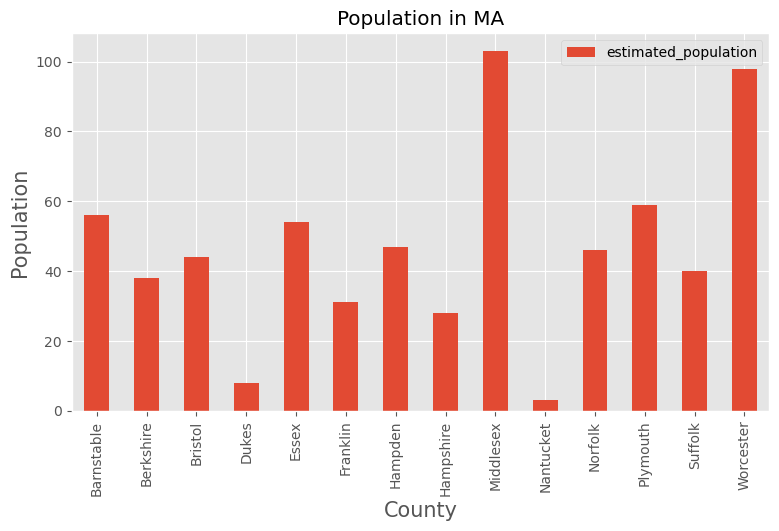

In [52]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Population in MA')
#On x-axis
plt.xlabel('County', fontsize = 15)
#On y-axis
plt.ylabel('Population', fontsize=15)
#giving a bar plot
ma_population.groupby('County')['estimated_population'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [55]:
boston_population = ma_population[ma_population['County'] == 'Suffolk'].reset_index(drop=True)
boston_population = boston_population.drop_duplicates()
boston_population.head()

,Neighborhood,County,estimated_population
0,Boston,Suffolk,3312
1,Boston,Suffolk,4145
2,Boston,Suffolk,4313
3,Boston,Suffolk,4467
4,Boston,Suffolk,417


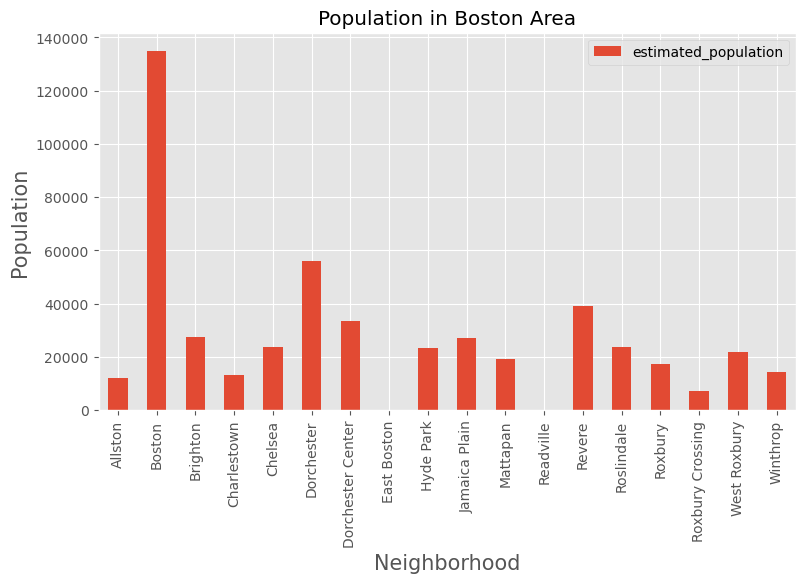

In [56]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Population in Boston Area')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('Population', fontsize=15)
#giving a bar plot
boston_population.groupby('Neighborhood')['estimated_population'].sum().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [133]:
# one hot encoding
boston_onehot = pd.get_dummies(boston_asian_rest[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
boston_onehot['Neighborhood'] = boston_asian_rest['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [boston_onehot.columns[-1]] + list(boston_onehot.columns[:-1])
boston_onehot = boston_onehot[fixed_columns]

boston_onehot.shape

(153, 15)

In [134]:
boston_grouped = boston_onehot.groupby('Neighborhood').mean().reset_index()
boston_grouped                         # 
boston_grouped.shape    

(10, 15)

In [135]:
num_top_venues = 20 
for hood in boston_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = boston_grouped[boston_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 3})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ALLSTON----
                            venue   freq
0               Korean Restaurant  0.250
1                Sushi Restaurant  0.167
2           Vietnamese Restaurant  0.167
3                Asian Restaurant  0.083
4             Dumpling Restaurant  0.083
5               Indian Restaurant  0.083
6             Japanese Restaurant  0.083
7                 Thai Restaurant  0.083
8              Dim Sum Restaurant  0.000
9               Hotpot Restaurant  0.000
10               Malay Restaurant  0.000
11                   Noodle House  0.000
12            Szechuan Restaurant  0.000
13  Vegetarian / Vegan Restaurant  0.000


----BOSTON----
                            venue   freq
0                Asian Restaurant  0.304
1                Sushi Restaurant  0.174
2              Dim Sum Restaurant  0.087
3               Hotpot Restaurant  0.087
4                    Noodle House  0.087
5             Japanese Restaurant  0.043
6               Korean Restaurant  0.043
7                Malay R

In [137]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [164]:
num_top_venues = 10     # normally only the top 10 

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = boston_grouped['Neighborhood']

for ind in np.arange(boston_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(boston_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(18)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ALLSTON,Korean Restaurant,Vietnamese Restaurant,Sushi Restaurant,Thai Restaurant,Japanese Restaurant,Indian Restaurant,Dumpling Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Szechuan Restaurant
1,BOSTON,Asian Restaurant,Sushi Restaurant,Noodle House,Hotpot Restaurant,Dim Sum Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Szechuan Restaurant,Malay Restaurant,Korean Restaurant
2,BRIGHTON,Sushi Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Szechuan Restaurant,Noodle House,Malay Restaurant,Korean Restaurant,Japanese Restaurant,Indian Restaurant
3,DORCHESTER,Asian Restaurant,Sushi Restaurant,Noodle House,Hotpot Restaurant,Dim Sum Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Szechuan Restaurant,Malay Restaurant,Korean Restaurant
4,DORCHESTER CENTER,Asian Restaurant,Sushi Restaurant,Noodle House,Hotpot Restaurant,Dim Sum Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Szechuan Restaurant,Malay Restaurant,Korean Restaurant
5,EAST BOSTON,Asian Restaurant,Sushi Restaurant,Noodle House,Hotpot Restaurant,Dim Sum Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Szechuan Restaurant,Malay Restaurant,Korean Restaurant
6,JAMAICA PLAIN,Indian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Szechuan Restaurant,Sushi Restaurant,Noodle House,Malay Restaurant,Korean Restaurant,Japanese Restaurant
7,REVERE,Asian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Szechuan Restaurant,Sushi Restaurant,Noodle House,Malay Restaurant,Korean Restaurant,Japanese Restaurant
8,ROXBURY,Asian Restaurant,Sushi Restaurant,Noodle House,Hotpot Restaurant,Dim Sum Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Szechuan Restaurant,Malay Restaurant,Korean Restaurant
9,ROXBURY CROSSING,Asian Restaurant,Sushi Restaurant,Noodle House,Hotpot Restaurant,Dim Sum Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Szechuan Restaurant,Malay Restaurant,Korean Restaurant


In [104]:
neighborhoods_venues_sorted.to_csv(r'Boston Asian Restaurant Venues.csv')

VISUALIZATION OF THE CLUSTER VENUES 

In [145]:
#Run k-means to cluster Asian venues in the neighborhood into 18 clusters.
kclusters = 5           # set number of clusters

# new data frame for grouping by neighborhood
boston_grouped_clustering = boston_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(boston_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:18]

array([4, 0, 2, 0, 0, 0, 1, 3, 0, 0], dtype=int32)

In [ ]:
#Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [155]:
boston_merged = boston_asian_rest

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
boston_merged = boston_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

boston_merged.head() # check the last columns!

,Venue,Neighborhood,Venue Latitude,Venue Longitude,Venue Category,Venue ID,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Shabu Zen,ALLSTON,42.352678,-71.129113,Japanese Restaurant,4a89e36df964a520430920e3,4.0,Korean Restaurant,Vietnamese Restaurant,Sushi Restaurant,Thai Restaurant,Japanese Restaurant,Indian Restaurant,Dumpling Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Szechuan Restaurant
9,Oppa Sushi,ALLSTON,42.350910,-71.131357,Sushi Restaurant,534ef45f498e6d754cce70c2,4.0,Korean Restaurant,Vietnamese Restaurant,Sushi Restaurant,Thai Restaurant,Japanese Restaurant,Indian Restaurant,Dumpling Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Szechuan Restaurant
10,Dolphin Bay,ALLSTON,42.352553,-71.128739,Asian Restaurant,554aa34d498e49a9de10481f,4.0,Korean Restaurant,Vietnamese Restaurant,Sushi Restaurant,Thai Restaurant,Japanese Restaurant,Indian Restaurant,Dumpling Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Szechuan Restaurant
12,bb.q chicken,ALLSTON,42.351014,-71.131353,Fried Chicken Joint,58d5a4a713af1c20e21f6b81,4.0,Korean Restaurant,Vietnamese Restaurant,Sushi Restaurant,Thai Restaurant,Japanese Restaurant,Indian Restaurant,Dumpling Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Szechuan Restaurant
13,Mala Restaurant,ALLSTON,42.352960,-71.131033,Chinese Restaurant,5599b403498e4220e1753509,4.0,Korean Restaurant,Vietnamese Restaurant,Sushi Restaurant,Thai Restaurant,Japanese Restaurant,Indian Restaurant,Dumpling Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Szechuan Restaurant


In [154]:
boston_merged.loc[boston_merged['Cluster Labels'] == 0, boston_merged.columns[[1] + list(range(5, boston_merged.shape[1]))]]

,Neighborhood,Venue ID,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
49,BOSTON,4ac7f9fcf964a520fbba20e3,0,Asian Restaurant,Sushi Restaurant,Noodle House,Hotpot Restaurant,Dim Sum Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Szechuan Restaurant,Malay Restaurant,Korean Restaurant
50,BOSTON,500f2993e4b0fe0c6fda6c61,0,Asian Restaurant,Sushi Restaurant,Noodle House,Hotpot Restaurant,Dim Sum Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Szechuan Restaurant,Malay Restaurant,Korean Restaurant
55,BOSTON,5a13605ee96d0c3ed5b426d8,0,Asian Restaurant,Sushi Restaurant,Noodle House,Hotpot Restaurant,Dim Sum Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Szechuan Restaurant,Malay Restaurant,Korean Restaurant
57,BOSTON,54340d65498efe796118e0a2,0,Asian Restaurant,Sushi Restaurant,Noodle House,Hotpot Restaurant,Dim Sum Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Szechuan Restaurant,Malay Restaurant,Korean Restaurant
59,BOSTON,53c1bcdb498e0567f9c29514,0,Asian Restaurant,Sushi Restaurant,Noodle House,Hotpot Restaurant,Dim Sum Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Szechuan Restaurant,Malay Restaurant,Korean Restaurant
68,BOSTON,4a42d407f964a52046a61fe3,0,Asian Restaurant,Sushi Restaurant,Noodle House,Hotpot Restaurant,Dim Sum Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Szechuan Restaurant,Malay Restaurant,Korean Restaurant
74,BOSTON,4a932354f964a520e81e20e3,0,Asian Restaurant,Sushi Restaurant,Noodle House,Hotpot Restaurant,Dim Sum Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Szechuan Restaurant,Malay Restaurant,Korean Restaurant
75,BOSTON,4c91546ab641236ab6a68079,0,Asian Restaurant,Sushi Restaurant,Noodle House,Hotpot Restaurant,Dim Sum Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Szechuan Restaurant,Malay Restaurant,Korean Restaurant
76,BOSTON,4a7d9ccaf964a520eeee1fe3,0,Asian Restaurant,Sushi Restaurant,Noodle House,Hotpot Restaurant,Dim Sum Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Szechuan Restaurant,Malay Restaurant,Korean Restaurant
81,BOSTON,4a91e4f7f964a520421c20e3,0,Asian Restaurant,Sushi Restaurant,Noodle House,Hotpot Restaurant,Dim Sum Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Szechuan Restaurant,Malay Restaurant,Korean Restaurant


In [156]:
boston_merged.loc[boston_merged['Cluster Labels'] == 1, boston_merged.columns[[1] + list(range(5, boston_merged.shape[1]))]]

,Neighborhood,Venue ID,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
518,JAMAICA PLAIN,574661f2498e9261f87ddf92,1.0,Indian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Szechuan Restaurant,Sushi Restaurant,Noodle House,Malay Restaurant,Korean Restaurant,Japanese Restaurant
520,JAMAICA PLAIN,50321353e4b07a83cca796b8,1.0,Indian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Szechuan Restaurant,Sushi Restaurant,Noodle House,Malay Restaurant,Korean Restaurant,Japanese Restaurant
521,JAMAICA PLAIN,4ab686def964a5209b7720e3,1.0,Indian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Szechuan Restaurant,Sushi Restaurant,Noodle House,Malay Restaurant,Korean Restaurant,Japanese Restaurant
522,JAMAICA PLAIN,544d3907498ee019d193d430,1.0,Indian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Szechuan Restaurant,Sushi Restaurant,Noodle House,Malay Restaurant,Korean Restaurant,Japanese Restaurant
525,JAMAICA PLAIN,51db6a0d498e66ba30fb5ccf,1.0,Indian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Szechuan Restaurant,Sushi Restaurant,Noodle House,Malay Restaurant,Korean Restaurant,Japanese Restaurant
529,JAMAICA PLAIN,5bba8f24c21cb10039d27326,1.0,Indian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Szechuan Restaurant,Sushi Restaurant,Noodle House,Malay Restaurant,Korean Restaurant,Japanese Restaurant


In [157]:
boston_merged.loc[boston_merged['Cluster Labels'] == 2, boston_merged.columns[[1] + list(range(5, boston_merged.shape[1]))]]

,Neighborhood,Venue ID,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
149,BRIGHTON,43a6b9a9f964a520602c1fe3,2.0,Sushi Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Szechuan Restaurant,Noodle House,Malay Restaurant,Korean Restaurant,Japanese Restaurant,Indian Restaurant
151,BRIGHTON,4ab6a139f964a520417820e3,2.0,Sushi Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Szechuan Restaurant,Noodle House,Malay Restaurant,Korean Restaurant,Japanese Restaurant,Indian Restaurant
152,BRIGHTON,4a63536cf964a520c2c41fe3,2.0,Sushi Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Szechuan Restaurant,Noodle House,Malay Restaurant,Korean Restaurant,Japanese Restaurant,Indian Restaurant
156,BRIGHTON,57b74d81498edb84968e0ea2,2.0,Sushi Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Szechuan Restaurant,Noodle House,Malay Restaurant,Korean Restaurant,Japanese Restaurant,Indian Restaurant
160,BRIGHTON,3fd66200f964a520c2eb1ee3,2.0,Sushi Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Szechuan Restaurant,Noodle House,Malay Restaurant,Korean Restaurant,Japanese Restaurant,Indian Restaurant
164,BRIGHTON,4b48ace2f964a520645226e3,2.0,Sushi Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Szechuan Restaurant,Noodle House,Malay Restaurant,Korean Restaurant,Japanese Restaurant,Indian Restaurant
167,BRIGHTON,54f9fd5c498e590ea8c60dd0,2.0,Sushi Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Szechuan Restaurant,Noodle House,Malay Restaurant,Korean Restaurant,Japanese Restaurant,Indian Restaurant
170,BRIGHTON,4de9402fae6029331905a8de,2.0,Sushi Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Szechuan Restaurant,Noodle House,Malay Restaurant,Korean Restaurant,Japanese Restaurant,Indian Restaurant
173,BRIGHTON,4ad7bc20f964a520420e21e3,2.0,Sushi Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Szechuan Restaurant,Noodle House,Malay Restaurant,Korean Restaurant,Japanese Restaurant,Indian Restaurant
174,BRIGHTON,4ad0153ef964a52089d720e3,2.0,Sushi Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Szechuan Restaurant,Noodle House,Malay Restaurant,Korean Restaurant,Japanese Restaurant,Indian Restaurant


In [158]:
boston_merged.loc[boston_merged['Cluster Labels'] == 3, boston_merged.columns[[1] + list(range(5, boston_merged.shape[1]))]]

,Neighborhood,Venue ID,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
549,REVERE,4bafd57cf964a5207d243ce3,3.0,Asian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Szechuan Restaurant,Sushi Restaurant,Noodle House,Malay Restaurant,Korean Restaurant,Japanese Restaurant
552,REVERE,4c2bcdd32219c9281f32a548,3.0,Asian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Szechuan Restaurant,Sushi Restaurant,Noodle House,Malay Restaurant,Korean Restaurant,Japanese Restaurant
565,REVERE,5b537046a9e402002c45ceb6,3.0,Asian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Szechuan Restaurant,Sushi Restaurant,Noodle House,Malay Restaurant,Korean Restaurant,Japanese Restaurant
567,REVERE,4c3255db7cc0c9b6e725f09a,3.0,Asian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Szechuan Restaurant,Sushi Restaurant,Noodle House,Malay Restaurant,Korean Restaurant,Japanese Restaurant
570,REVERE,5dcf5b910cd86e0008449976,3.0,Asian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Szechuan Restaurant,Sushi Restaurant,Noodle House,Malay Restaurant,Korean Restaurant,Japanese Restaurant


In [159]:
boston_merged.loc[boston_merged['Cluster Labels'] == 4, boston_merged.columns[[1] + list(range(5, boston_merged.shape[1]))]]

,Neighborhood,Venue ID,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,ALLSTON,4a89e36df964a520430920e3,4.0,Korean Restaurant,Vietnamese Restaurant,Sushi Restaurant,Thai Restaurant,Japanese Restaurant,Indian Restaurant,Dumpling Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Szechuan Restaurant
9,ALLSTON,534ef45f498e6d754cce70c2,4.0,Korean Restaurant,Vietnamese Restaurant,Sushi Restaurant,Thai Restaurant,Japanese Restaurant,Indian Restaurant,Dumpling Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Szechuan Restaurant
10,ALLSTON,554aa34d498e49a9de10481f,4.0,Korean Restaurant,Vietnamese Restaurant,Sushi Restaurant,Thai Restaurant,Japanese Restaurant,Indian Restaurant,Dumpling Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Szechuan Restaurant
12,ALLSTON,58d5a4a713af1c20e21f6b81,4.0,Korean Restaurant,Vietnamese Restaurant,Sushi Restaurant,Thai Restaurant,Japanese Restaurant,Indian Restaurant,Dumpling Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Szechuan Restaurant
13,ALLSTON,5599b403498e4220e1753509,4.0,Korean Restaurant,Vietnamese Restaurant,Sushi Restaurant,Thai Restaurant,Japanese Restaurant,Indian Restaurant,Dumpling Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Szechuan Restaurant
14,ALLSTON,4d0027192685a35dd345c790,4.0,Korean Restaurant,Vietnamese Restaurant,Sushi Restaurant,Thai Restaurant,Japanese Restaurant,Indian Restaurant,Dumpling Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Szechuan Restaurant
19,ALLSTON,528ed6f311d2782026f3db76,4.0,Korean Restaurant,Vietnamese Restaurant,Sushi Restaurant,Thai Restaurant,Japanese Restaurant,Indian Restaurant,Dumpling Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Szechuan Restaurant
20,ALLSTON,4a8de631f964a520581120e3,4.0,Korean Restaurant,Vietnamese Restaurant,Sushi Restaurant,Thai Restaurant,Japanese Restaurant,Indian Restaurant,Dumpling Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Szechuan Restaurant
21,ALLSTON,4bc8701514d79521410569e9,4.0,Korean Restaurant,Vietnamese Restaurant,Sushi Restaurant,Thai Restaurant,Japanese Restaurant,Indian Restaurant,Dumpling Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Szechuan Restaurant
22,ALLSTON,57845b4e498e0942ee8b3ce6,4.0,Korean Restaurant,Vietnamese Restaurant,Sushi Restaurant,Thai Restaurant,Japanese Restaurant,Indian Restaurant,Dumpling Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Szechuan Restaurant


In [204]:
def getRestaurntDetails(names,IDs):
    radius=500
    LIMIT=100
    CLIENT_ID = 'FM32E0UU4KR1WU4VZIG1F5G1J2XFMKEGNF52UGPTSQ1J1CF1'# Foursquare ID, note there is a daily call quota limit 
    CLIENT_SECRET ='R5SUZ4FBHNDVUMHP15ZKFIKI5VCQBLGPYSFGZY2LYQXMILX2' # Foursquare Secret, note there is a daily call quota it
    
    details_list=[]
    for name,ID in zip(names,IDs):
        print(name)
            
        # create the API request URL
        url="https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}".format(
            ID,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION         )
      # make the GET request  
    group_data = requests.get(url).json()
    
    if group_data.get("response"):
        
            #print(group_data.get("response"))
                      
            if group_data.get("response").get("venue"):
                if group_data.get("response").get("venue").get("price"):
                    if group_data.get("response").get("venue").get("price").get("message"):
                        
                            details_list.append([(name, 
                                                  group_data.get("response").get('venue').get("price").get("message"),
                                                  group_data.get("response").get('venue').get("rating"),
                                                  group_data.get("response").get('venue').get("likes").get("count")
                                                 ) ])
                            

    column_names=['Rest_name','Price','Likes','Rating','Likes Count']
    details = pd.DataFrame(details_list,columns=column_names)

    return(details)
    


In [ ]:
      # return only relevant information for each nearby venue
    venue_data=results['response']['venue']
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [195]:
boston_rest_2.shape
boston_rest_2_distinct=boston_rest_2.drop_duplicates('Venue')
boston_rest_3=boston_rest_2_distinct.iloc[0:200,:]

In [205]:
boston_rest_details = getRestaurntDetails(boston_rest_3.get('Venue'),
                                            boston_rest_3.get("Venue ID")
                                  )
boston_rest_details.head(10)

Shabu Zen
Oppa Sushi
Dolphin Bay
bb.q chicken
Mala Restaurant
BonChon Chicken
Seoul Soulongtang
Carlo's Cucina Italiana
Garlic 'n Lemons
Dumpling Kingdom
Punjab Palace
Fish Market Sushi Bar
Coreanos
Myung Dong 1st Ave
Jo Jo TaiPei
Anna's Taqueria
The Daily Catch
Habanero Mexican Grill
Le's Vietnamese Restaurant
Pho Viet's
Thai Place
Amelia's Taqueria
May's Fusion and Cuisine
La Mamma Pizza
Natalie's Pizza & Subs
Lilly's Gourmet Pasta Express
Shojo
Figaro's
Gourmet Dumpling House
Taiwan Cafe
Tora
Double Chin
Peach Farm
Crave - Mad for Chicken
Troquet On South
Stillwater
O Ya
163 Vietnamese Sandwiches & Bubble Tea
Q Restaurant
Hei La Moon
Gourmet China House
Boston Kitchen Pizza
Pho Pasteur
Irashai Sushi Teriyaki
Avana Sushi
Winsor Dim Sum Cafe
Gene's Chinese Flatbread Cafe
sweetgreen
Hong Kong Eatery
Hot Eastern
5 Spices House
New Jumbo Seafood Restaurant
Dumpling Cafe
Al's South Street Cafe
The Chicken & Rice Guys Store
Spicy World
New Saigon Sandwich
My Thai Vegan Cafe
Teatro
Penang M

ValueError: 5 columns passed, passed data had 1 columns